# Wavelet Playground

#### This ipython notebook contains code for exploring relationships between spectra and biochemical traits with wavelets.

In [145]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt,os
home = os.path.expanduser("~")
from scipy import integrate
from ipywidgets import *

def mapper(x):
    '''Remap column to int if possible
    '''
    try:
        return int(x)
    except:
        return x

In [144]:
def mex_h(t,a):
    first = 2/(np.sqrt(3*a)*(np.pi**.25))
    second = 1- ((t/a)**2)
    third = np.exp((-t**2)/(2*a**2))
    return first*second*third

def plot_wavelet(scale,translation):    
    t = np.arange(-7*scale,8*scale)
    wave = mex_h(t,scale) 
    fig = plt.figure(figsize= (4,4))
    ax = fig.add_subplot(111)
    ax.plot(t+translation,wave,c ='#1a9850',lw = 2)
    ax.set_xlim(-100,100)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #change axes line widths
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    plt.show()
    
_ = interact(plot_wavelet,scale = (1,21,2),translation = (-50,50,2),continuous_update=False)  

interactive(children=(IntSlider(value=11, description='scale', max=21, min=1, step=2), IntSlider(value=0, desc…

In [146]:
def gaussian(x, mu, fwhm):
    sig = fwhm/(2* np.sqrt(2*np.log(2)))
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

#Create a signal with peaks and dips\
signal = np.zeros(200)
signal += gaussian(np.arange(200), 50, 3)
signal -= .2 * gaussian(np.arange(200), 75, 3)
signal += gaussian(np.arange(200), 125, 10)
signal -= gaussian(np.arange(200), 150, 20)


def plot_convolution(scale,translation): 
    t = np.arange(-7*scale,7*scale)
    wave = mex_h(t,scale) 
    wavelet = np.convolve(signal,wave,mode='same')
    
    fig = plt.figure(figsize = (12,12))
    fig.tight_layout()
    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    ax1b = ax1.twinx()

    ax1b.plot(signal,c = '#c51b7d',lw=2)
    ax1.plot(t+translation,wave,c ='#1a9850',lw = 1.5,ls ='--')
    ax1.set_ylim(-1*wave.max()*1.1,wave.max()*1.1)
    ax1b.set_ylim(-1*np.abs(signal).max()*1.1,np.abs(signal).max()*1.1)
    ax1.set_xlim(0,200)
    ax1.set_ylabel('Wavelet',fontsize = 14,c ='#1a9850')
    ax1b.set_ylabel('Signal',fontsize = 14,c ='#c51b7d')

    ax2.plot(wavelet,c ='k',lw = 2)
    ax2.set_ylim(-1*np.abs(wavelet).max()*1.1,np.abs(wavelet).max()*1.1)
    ax2.set_xlim(0,200)
    ax2.set_ylabel('Wavelet coefficient',fontsize = 14)
    ax2.hlines(0,0,200,color = '#4d4d4d',ls = '--')
    plt.show()
    
_  = interact(plot_convolution,translation = (5,200,5),scale = (1,21,2))  


interactive(children=(IntSlider(value=11, description='scale', max=21, min=1, step=2), IntSlider(value=100, de…

In [113]:
#Create a smoothly vary signal with peaks and dips
signal = np.ones(200)
for x in range(200):
    signal += gaussian(np.arange(200), np.random.randint(0,200),
                       np.random.randint(20,50))
    
    signal -= .2 * gaussian(np.arange(200),np.random.randint(0,200),
                            np.random.randint(20,50))
    
    
# Add some weak absorptions    
for x in range(5):
    signal -=  np.random.randint(1,3) * gaussian(np.arange(200),np.random.randint(0,200),
                            np.random.randint(1,5))
#Center for clarity    
signal-=signal.mean()    
    
_ = interact(plot_convolution,translation = (5,200,5),scale = (1,21,2))  


interactive(children=(IntSlider(value=11, description='scale', max=21, min=1, step=2), IntSlider(value=100, de…

(400.0, 2500.0)

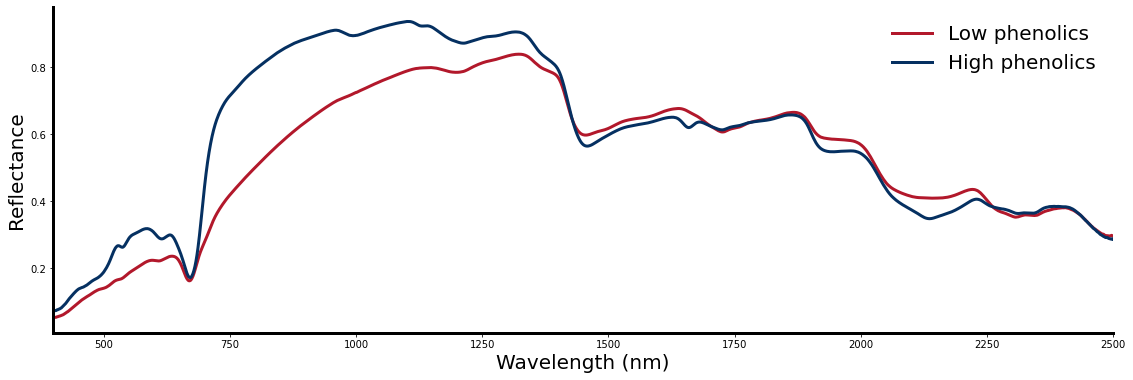

In [273]:
spectra = pd.read_csv('./spectral_data.csv')
spectra.columns = spectra.columns.map(mapper)
spectra['phen_scale'] = (spectra['tot_phenolics']-spectra['tot_phenolics'].min())/(spectra['tot_phenolics'].max()-spectra['tot_phenolics'].min())
waves = np.arange(400,2500) 

phen_min = spectra.iloc[spectra['tot_phenolics'].argmin()][waves]
phen_max = spectra.iloc[spectra['tot_phenolics'].argmax()][waves]

fig = plt.figure(figsize= (19,6))
ax = fig.add_subplot(111)
ax.plot(waves,phen_min,label = 'Low phenolics',c='#b2182b',lw=3)
ax.plot(waves,phen_max,label = 'High phenolics',c='#053061',lw=3)
ax.set_ylabel("Reflectance",fontsize = 20)
ax.set_xlabel("Wavelength (nm)",fontsize = 20)
ax.legend(frameon = False,fontsize =20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#change axes line widths
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.set_xlim(400,2500)

In [150]:
def plot_convolution(scale): 
    t = np.arange(-7*scale,7*scale)
    wave = mex_h(t,scale) 
    
    fig = plt.figure(figsize = (12,10))
    fig.tight_layout()
    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    ax3 = fig.add_subplot(413)
    ax4 = fig.add_subplot(414)
    ax2b = ax2.twinx()
    ax3b = ax3.twinx()

    #Plot Wavelet
    ax1.plot(np.arange(len(wave)) + (1000-np.argmax(wave)),wave,c='k')
    ax1.set_xlim(0,2000)
    ax1.set_ylabel('Wavelet',fontsize= 14)

    #Plot Low Phenolics    
    wavelet_min = np.convolve(phen_min,wave,mode='same')
    wavelet_min[:5] = np.nan
    wavelet_min[-5:] = np.nan
    wmin_ymax = np.nanmax(np.abs(wavelet_min))*1.2

    ax2.plot(waves,wavelet_min,c = '#b2182b')
    ax2.set_ylim(-1*wmin_ymax,wmin_ymax)
    ax2b.plot(waves,phen_min,c = 'g',lw=2,alpha=.4)
    ax2b.set_ylabel('Reflectance',fontsize= 14,color = 'g')
    ax2.set_ylabel('Wavelet\ncoefficient',fontsize= 14,color = '#b2182b')
    ax2.text(.02,.9,'Low phenolics',
            transform=ax2.transAxes,ha = 'left',fontsize = 12,
             fontweight ='bold',c='#b2182b')
        
    #Plot High Phenolics    
    wavelet_max= np.convolve(phen_max,wave,mode='same')
    wavelet_max[:5] = np.nan
    wavelet_max[-5:] = np.nan
    wmax_ymax = np.nanmax(np.abs(wavelet_max))*1.2

    ax3.plot(waves,wavelet_max,c = '#053061')
    ax3.set_ylim(-1*wmax_ymax,wmax_ymax)
    ax3b.plot(waves,phen_max,c = 'g',lw=2,alpha=.4)
    ax3b.set_ylabel('Reflectance',fontsize= 14,color = 'g')
    ax3.set_ylabel('Wavelet\ncoefficient',fontsize= 14,color = '#053061')
    ax3.text(.02,.9,'High phenolics',
            transform=ax3.transAxes,ha = 'left',fontsize = 12,
             fontweight ='bold',c='#053061')


    #Plot Low and High Phenolics    
    ax4.plot(waves,wavelet_min,label = 'Low phenolics',c='#b2182b',lw=1.5)
    ax4.plot(waves,wavelet_max,label = 'High phenolics',c='#053061',lw=1.5)
    ymax = np.max([wmin_ymax,wmax_ymax])
    ax4.set_ylim(-1*ymax,ymax)
    ax4.set_ylabel('Wavelet\ncoefficient',fontsize= 14,color = 'k')

    for ax in [ax2,ax3,ax4]:
        ax.set_xlim(400,2500)
    
    plt.show()
    
_ = interact(plot_convolution,scale = (1,100,5))  

interactive(children=(IntSlider(value=46, description='scale', min=1, step=5), Output()), _dom_classes=('widge…

In [307]:
def plot_convolution(scale,center): 
    t = np.arange(-7*scale,7*scale)
    wave = mex_h(t,scale) 
    
    fig = plt.figure(figsize = (17,5))
    fig.tight_layout()
    ax1 = plt.subplot2grid((2,7), (0, 0), rowspan=1,colspan=4)
    ax2 = plt.subplot2grid((2,7), (1, 0), rowspan=1, colspan=4)
    ax3 = plt.subplot2grid((2,7), (0, 4), rowspan=2,colspan=2)

    center_vals = []
    
    wavelets = []
    
    for s,spectrum in spectra.iterrows():
        wavelet = np.convolve(spectrum[waves],wave,mode='same')
        wavelets.append(wavelet)
        wavelet[:10] = np.nan
        wavelet[-10:] = np.nan
        ax1.plot(waves,wavelet,c = plt.get_cmap('jet')(spectrum['phen_scale']))
        center_vals.append(wavelet[center-400])
        
    wavelets = np.array(wavelets).T   
    ymax = np.max(np.abs(wavelets[center-400,:]))*1.5  
    ax1.vlines(center,-1*ymax,ymax,color='r')    
    ax1.set_ylabel("Wavelet coeff.",fontsize = 14)
    ax1.set_ylim(-1*ymax,ymax)
    ax1.set_xlim(center-100,center+100)

    corr = []
    for w in wavelets:
        corr.append(np.corrcoef(w,spectra['tot_phenolics'])[0][1])
    
    ax2.plot(corr,c='k') 
    ax2.set_ylabel("Correlation coeff.",fontsize = 14)
    ax2.set_xlabel("Wavelength (nm)",fontsize = 14)

    ax3.scatter(center_vals,spectra['tot_phenolics'])   
    ax3.set_ylabel("Total phenolics",fontsize = 14)
    ax3.set_xlabel("Wavelet coeff.",fontsize = 14)
    
    for ax in [ax1,ax2,ax3]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #change axes line widths
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        
    plt.subplots_adjust(wspace = 0.4)
    plt.show()
    
_ = interact(plot_convolution,scale = (1,20,1),center = [1130,1660,2135])  

interactive(children=(IntSlider(value=10, description='scale', max=20, min=1), Dropdown(description='center', …

## PyWavelets

In [312]:
import pywt

wavelet= 'mexh'
scale_max = 21
trait = 'tot_phenolics'

# Compute wavelet
wavelets = []
for row in spectra.index:
    sig = spectra.loc[row,waves].values
    widths = np.arange(1, scale_max)
    cwtmatr, freqs = pywt.cwt(sig, widths, wavelet)
    wavelets.append(cwtmatr)
wavelets = np.array(wavelets)   

#Calculate correlation coefficients
corr_arr= np.zeros((scale_max-1,len(waves)))
for row in range(scale_max-1):
    for column in range(len(waves)):
        x = wavelets[:,row,column]
        y = spectra.loc[:,trait]
        corr_arr[row,column] = np.corrcoef(x, y)[0, 1]   

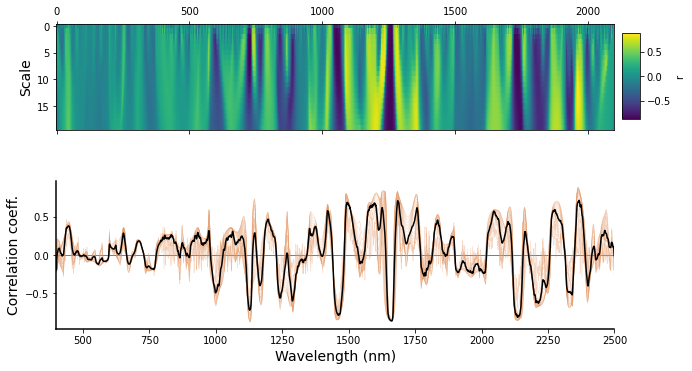

In [353]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)   
ax2 = fig.add_subplot(2,1,2)   
mat = ax1.matshow(corr_arr)
ax1.set_aspect(20)
ax1.set_ylabel('Scale',fontsize = 14)
cbar_ax = fig.add_axes([.91, .61, 0.025, 0.2])
cbar = fig.colorbar(mat, cax=cbar_ax)
cbar.set_label('r')

color= '#E59866'

_ = ax2.plot(waves,corr_arr.T,alpha=.4,lw=.5, c = color)
ax2.plot(waves,np.mean(corr_arr,axis=0),c='k')
ax2.set_xlabel("Wavelength (nm)",fontsize = 14)
ax2.set_ylabel("Correlation coeff.",fontsize = 14)

for ax in [ax2]:
    #hide right and top axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #change axes line widths
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    #change tick font size
    ax.tick_params(labelsize=10)
    ax.set_xlim(400,2500)
    ax.hlines(0,100,2500,lw=.5,color='k')
